In [11]:
import pandas as pd

import numpy as np

from sklearn.datasets import load_iris

data = load_iris()

#convert to a dataframe

df = pd.DataFrame(data.data, columns = data.feature_names)

#create the species column

df['Species'] = data.target

#replace this with the actual names

target = np.unique(data.target)

target_names = np.unique(data.target_names)

targets = dict(zip(target, target_names))

df['Species'] = df['Species'].replace(targets)

#The following step will be used to extract our testing and training datasets. The goal is to guarantee that the model is not trained on all of the given data, enabling us to observe how it performs on data that hasn't been seen before. If we use all of the data as training data, we risk overfitting the model, meaning it will perform poorly on unknown data.

#Extracting Datasets
x = df.drop(columns="Species")

y = df["Species"]

feature_names = x.columns

labels = y.unique()

#split the dataset

from sklearn.model_selection import train_test_split

X_train, test_x, y_train, test_lab = train_test_split(x,y,

                                                 test_size = 0.4,

                                                 random_state = 42)

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [13]:
test_pred_decision_tree = clf.predict(test_x)
test_pred_decision_tree

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor'], dtype=object)

In [14]:
clf.score(test_x, test_lab)

0.9833333333333333

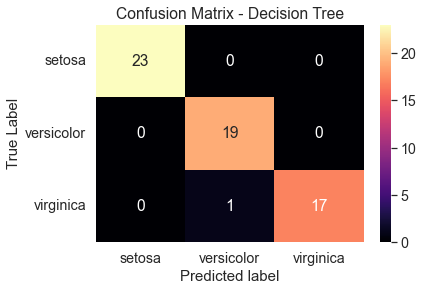

<Figure size 720x504 with 0 Axes>

In [15]:
from sklearn import metrics

import seaborn as sns

import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(test_lab,  

                                            test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()

sns.set(font_scale=1.3)

plt.figure(figsize=(10,7))

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Decision Tree')

ax.set_xlabel("Predicted label", fontsize =15)

ax.set_xticklabels(['']+labels)

ax.set_ylabel("True Label", fontsize=15)

ax.set_yticklabels(list(labels), rotation = 0)

plt.show()